This dataset reports flights occurred in 2008 in the United States, including carriers, arrival and departure delays, and reasons for delays.

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize']= (10, 10)
pd.options.display.float_format = '{:20,.2f}'.format
base_color = sns.color_palette()[0]

In [168]:
#opening the dataset

df_orig = pd.read_csv('2008.csv')
df_orig.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,"2,003.00",1955,"2,211.00",2225,WN,335,...,4.00,8.00,0,NaN,0,nan,nan,nan,nan,nan
1,2008,1,3,4,754.00,735,"1,002.00",1000,WN,3231,...,5.00,10.00,0,NaN,0,nan,nan,nan,nan,nan
2,2008,1,3,4,628.00,620,804.00,750,WN,448,...,3.00,17.00,0,NaN,0,nan,nan,nan,nan,nan
3,2008,1,3,4,926.00,930,"1,054.00",1100,WN,1746,...,3.00,7.00,0,NaN,0,nan,nan,nan,nan,nan
4,2008,1,3,4,"1,829.00",1755,"1,959.00",1925,WN,3920,...,3.00,10.00,0,NaN,0,2.00,0.00,0.00,0.00,32.00


In [169]:
# opening additional datasets

df_c = pd.read_csv('carriers.csv')
df_air = pd.read_csv('airports.csv')

In [170]:
# Creating back up copies

df = df_orig.copy()
df_c_backup = df_c.copy()
df_air_backup = df_air.copy()

In [171]:
# dropping unnecessary columns and replacing values with more clear names

df_air.drop(['airport', 'country', 'lat', 'long'], axis=1, inplace=True)
df_c.Description = df_c.Description.replace('US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)', 
                   'US Airways Inc')
df.CancellationCode = df.CancellationCode.replace('A', 'carrier')
df.CancellationCode = df.CancellationCode.replace('B', 'weather')
df.CancellationCode = df.CancellationCode.replace('C', 'NAS')
df.CancellationCode = df.CancellationCode.replace('D', np.nan)

**NOTE: Upon exploration I have found that D occurrency is 12 vs 30k+ of the others so I decided to eliminate it to obtain better graphs**

In [172]:
# Merging df_air datasets to the main one in order to replace the IATA airport code with the airport name

df = df.merge(df_air, left_on='Origin', right_on='iata')
df = df.merge(df_air, left_on='Dest', right_on='iata')
df.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,iata_x,city_x,state_x,iata_y,city_y,state_y
0,2008,1,3,4,"2,003.00",1955,"2,211.00",2225,WN,335,...,nan,nan,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL
1,2008,1,3,4,754.00,735,"1,002.00",1000,WN,3231,...,nan,nan,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL
2,2008,1,4,5,"2,002.00",1955,"2,208.00",2225,WN,335,...,nan,nan,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL
3,2008,1,4,5,734.00,735,938.00,1000,WN,3231,...,nan,nan,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL
4,2008,1,5,6,"2,000.00",1955,"2,214.00",2225,WN,335,...,nan,nan,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL
5,2008,1,5,6,731.00,735,938.00,1000,WN,3231,...,nan,nan,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL
6,2008,1,6,7,"1,959.00",1955,"2,211.00",2225,WN,335,...,nan,nan,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL
7,2008,1,6,7,734.00,735,935.00,1000,WN,3231,...,nan,nan,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL
8,2008,1,7,1,"1,951.00",1955,"2,159.00",2225,WN,335,...,nan,nan,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL
9,2008,1,7,1,737.00,735,"1,000.00",1000,WN,3231,...,nan,nan,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL


In [173]:
# Merging df_c datasets to the main one in order to replace the carrier code with the carrier name

df = df.merge(df_c, left_on='UniqueCarrier', right_on='Code')
df.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,SecurityDelay,LateAircraftDelay,iata_x,city_x,state_x,iata_y,city_y,state_y,Code,Description
0,2008,1,3,4,"2,003.00",1955,"2,211.00",2225,WN,335,...,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL,WN,Southwest Airlines Co.
1,2008,1,3,4,754.00,735,"1,002.00",1000,WN,3231,...,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL,WN,Southwest Airlines Co.
2,2008,1,4,5,"2,002.00",1955,"2,208.00",2225,WN,335,...,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL,WN,Southwest Airlines Co.
3,2008,1,4,5,734.00,735,938.00,1000,WN,3231,...,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL,WN,Southwest Airlines Co.
4,2008,1,5,6,"2,000.00",1955,"2,214.00",2225,WN,335,...,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL,WN,Southwest Airlines Co.
5,2008,1,5,6,731.00,735,938.00,1000,WN,3231,...,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL,WN,Southwest Airlines Co.
6,2008,1,6,7,"1,959.00",1955,"2,211.00",2225,WN,335,...,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL,WN,Southwest Airlines Co.
7,2008,1,6,7,734.00,735,935.00,1000,WN,3231,...,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL,WN,Southwest Airlines Co.
8,2008,1,7,1,"1,951.00",1955,"2,159.00",2225,WN,335,...,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL,WN,Southwest Airlines Co.
9,2008,1,7,1,737.00,735,"1,000.00",1000,WN,3231,...,nan,nan,IAD,Chantilly,VA,TPA,Tampa,FL,WN,Southwest Airlines Co.


In [174]:
# Dropping columns with codes, renaming more clearly the new columns

df.drop(['UniqueCarrier', 'Origin', 'Dest', 'iata_x','iata_y', 'Code'], axis=1, inplace=True)
df.rename(columns={'city_x':'Origin','city_y':'Dest', 'state_x':'Orig_State', 'state_y':'Dest_State', 
                   'Description': 'Carrier'}, inplace= True)

In [175]:
# removing the zero values

df.replace(0, np.nan, inplace=True)

In [176]:
# creating a dataset with only the departures delays

df1 = df[df.DepDelay>0]
df1.ArrDelay.describe()

count           2,629,363.00
mean                   31.04
std                    52.53
min                  -109.00
25%                     2.00
50%                    15.00
75%                    41.00
max                 2,461.00
Name: ArrDelay, dtype: float64

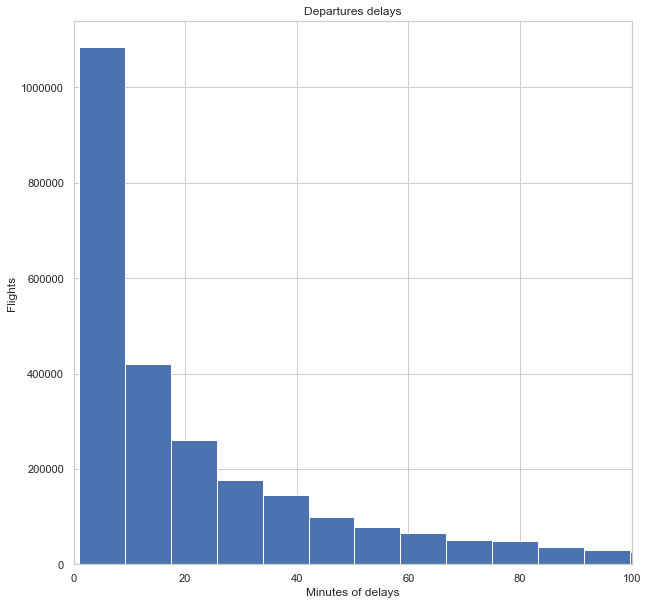

In [177]:
# Plotting the DepDelay column only for the delayed flights

df1.DepDelay.plot(kind='hist', bins= 300)
plt.xlabel('Minutes of delays')
plt.ylabel('Flights')
plt.title('Departures delays')
plt.xlim(0,100);

In [178]:
# Creating a dataset with only the arrivals delays

df2 = df[df.ArrDelay>0]
df2.ArrDelay.describe()

count           2,979,504.00
mean                   32.17
std                    48.13
min                     1.00
25%                     6.00
50%                    15.00
75%                    38.00
max                 2,461.00
Name: ArrDelay, dtype: float64

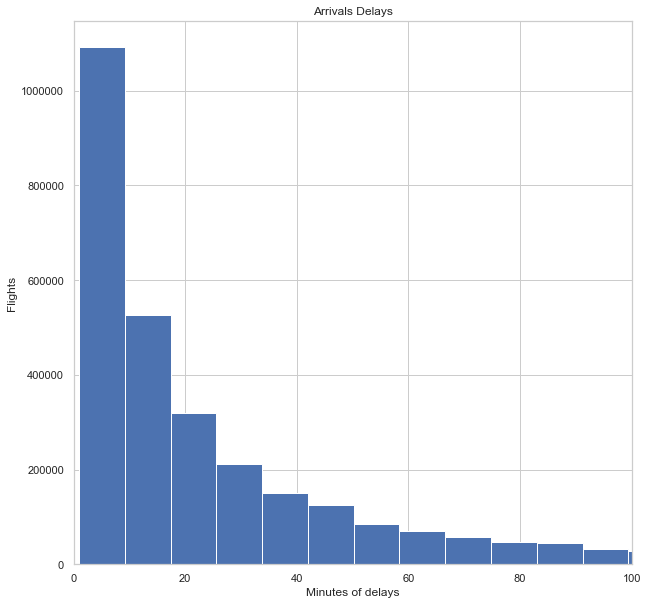

In [179]:
# Plotting the DepDelay column only for the delayed flights

df2.ArrDelay.plot(kind='hist', bins=300)
plt.xlim(0,100)
plt.xlabel('Minutes of delays')
plt.ylabel('Flights')
plt.title('Arrivals Delays');

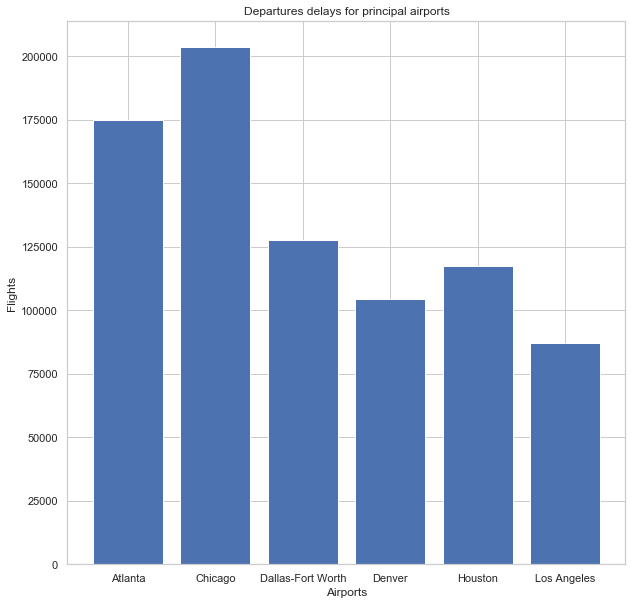

In [180]:
# Plotting the top 6 airports in terms of departures delays

df_org = df1.Origin.value_counts()[:6]
df_org = df_org.to_frame().reset_index()
plt.bar(data=df_org, x='index', height='Origin')
plt.title('Departures delays for principal airports')
plt.xlabel('Airports')
plt.ylabel('Flights'); 

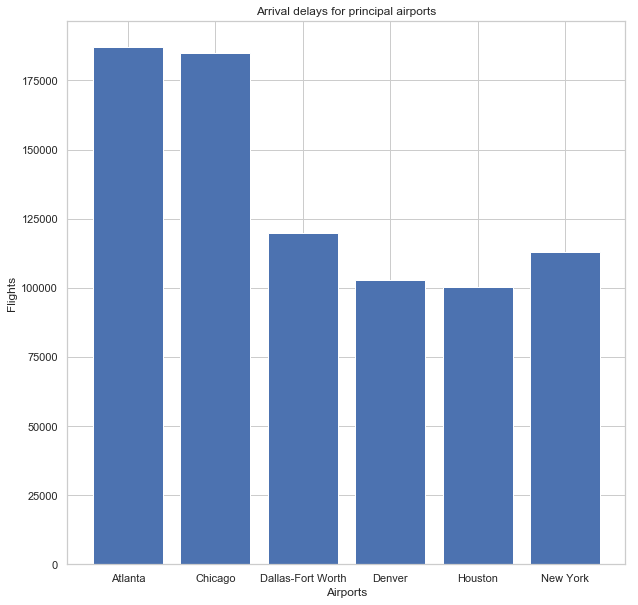

In [181]:
# Plotting the top 6 airports in terms of arrivals delays

df_dest = df2.Dest.value_counts()[:6]
df_dest = df_dest.to_frame().reset_index()
plt.bar(data=df_dest, x='index', height='Dest')
plt.title('Arrival delays for principal airports')
plt.xlabel('Airports')
plt.ylabel('Flights');

### Main reasons for a flight cancellation

The most common reasons for cancellation are either adverse weather conditons or a carrier issue. 

Less probable but still worth to mention, are NAS cancellations.

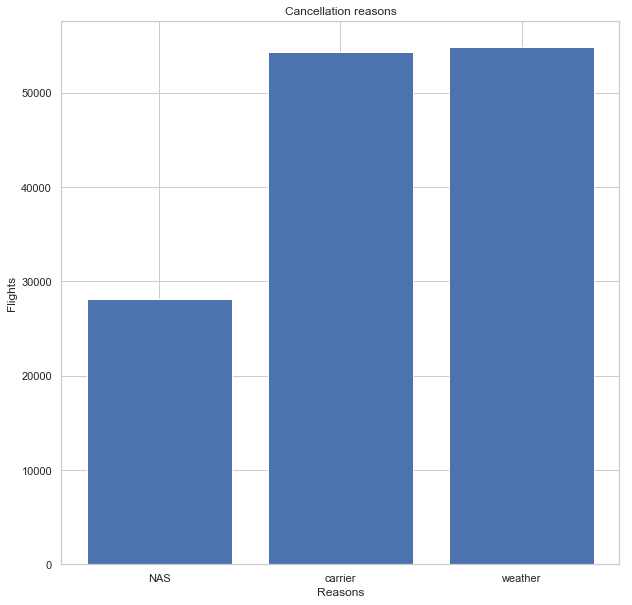

In [182]:
#Cancellation Reasons distribution

df3 = df.CancellationCode.value_counts()
df3 = df3.to_frame().reset_index()
plt.bar(data=df3, x='index', height='CancellationCode')
plt.title('Cancellation reasons')
plt.xlabel('Reasons')
plt.ylabel('Flights');

### Busiest Carriers

In terms of number of flights, Southwest Airlines is well ahead of their competitors. Follow American Airlines, Skywest Airlines, american Eagle and US Airways for the top 5.

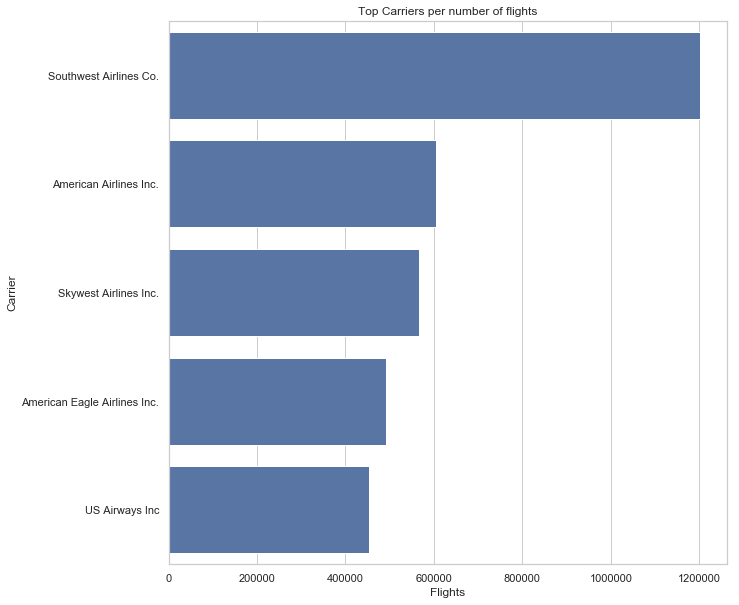

In [183]:
# Top 5 carrier per number of flights

top_carrier = df.Carrier.value_counts()[:5]
top_carrier = top_carrier.to_frame().reset_index()
sns.barplot(data=top_carrier, y='index', x='Carrier', color=base_color)
plt.title('Top Carriers per number of flights')
plt.xlabel('Flights')
plt.ylabel('Carrier'); 

### Principal airports in term of departure and arrival flights

The same 6 airports rank as the busiest in the US in terms both of departures and delays.

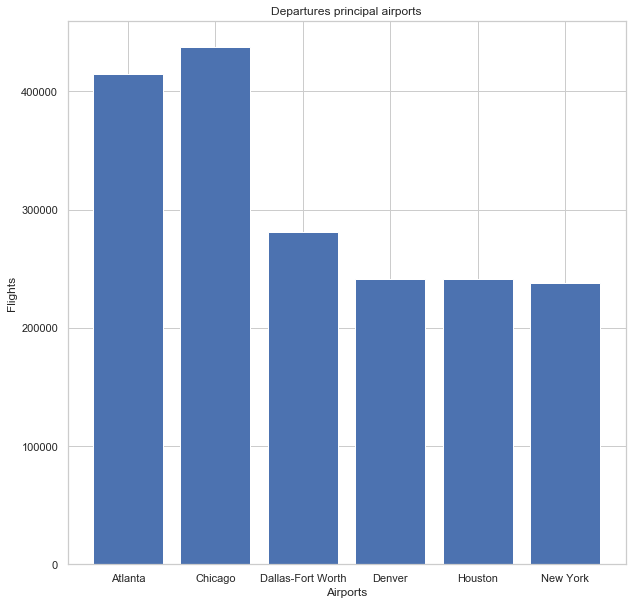

In [184]:
# Top 6 airport per number of Departures

busy_dep = df.Origin.value_counts()[:6]
busy_dep= busy_dep.to_frame().reset_index()
busy_dep = busy_dep.rename(columns={'index': 'Airport'})

plt.bar(data=busy_dep, x='Airport', height='Origin')
plt.title('Departures principal airports')
plt.xlabel('Airports')
plt.ylabel('Flights');

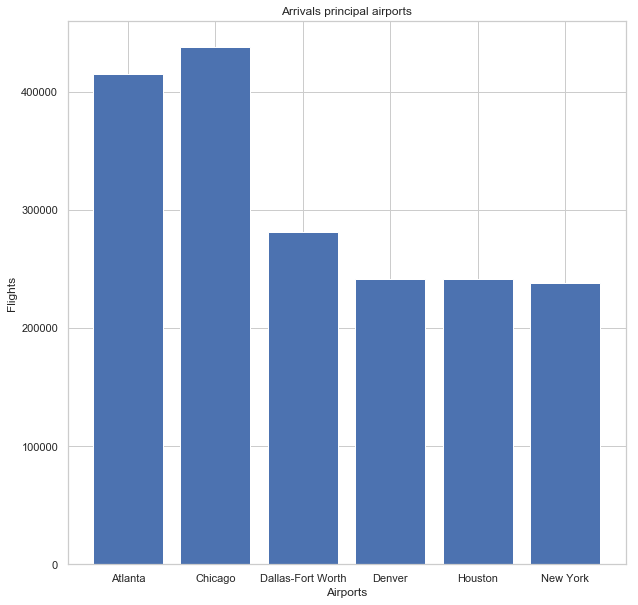

In [185]:
# Top 6 airport per number of Arrivals

busy_arr = df.Dest.value_counts()[:6]
busy_arr= busy_arr.to_frame().reset_index()
busy_arr = busy_arr.rename(columns={'index': 'Airport'})

plt.bar(data=busy_arr, x='Airport', height='Dest')
plt.title('Arrivals principal airports')
plt.xlabel('Airports')
plt.ylabel('Flights');

### Average Departures delay in the busiest airports   

New York stands out with an average departure delay of over 40 minutes, followed by Chicago with over 35 minutes.

conversly, the other top airports keep the average departure delay between 25-30 minutes.

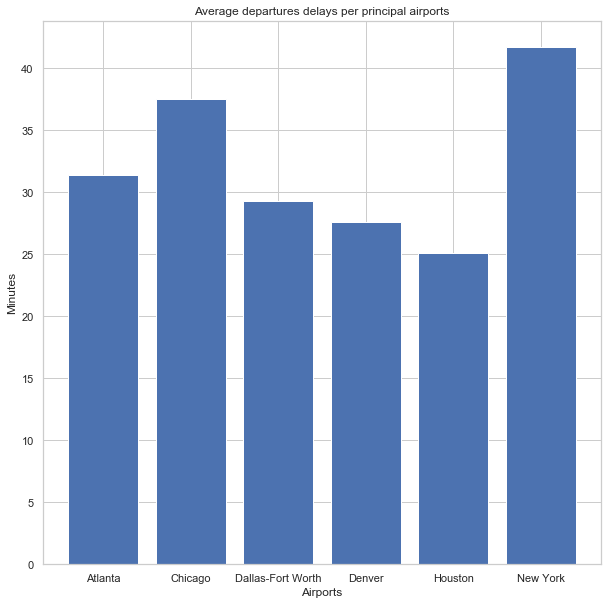

In [186]:
# Average Departures delay in the top airports

busy_air_dep_d = df1.query('Origin in @busy_dep.Airport') #filtering for the top departures airports
busy_air_dep_d = busy_air_dep_d.groupby(['Origin']).DepDelay.mean()
busy_air_dep_d = busy_air_dep_d.to_frame().reset_index()

plt.bar(data=busy_air_dep_d, x='Origin', height='DepDelay')
plt.title('Average departures delays per principal airports')
plt.xlabel('Airports')
plt.ylabel('Minutes')
plt.show();

### Average arrivals delay in the busiest airports   

Similarly to the departures delays, the other top airports have an average delay around 30 minutes.

New York, instead, is joined by Chicago as the airports with the highest average arrival delay with over 40 minutes.

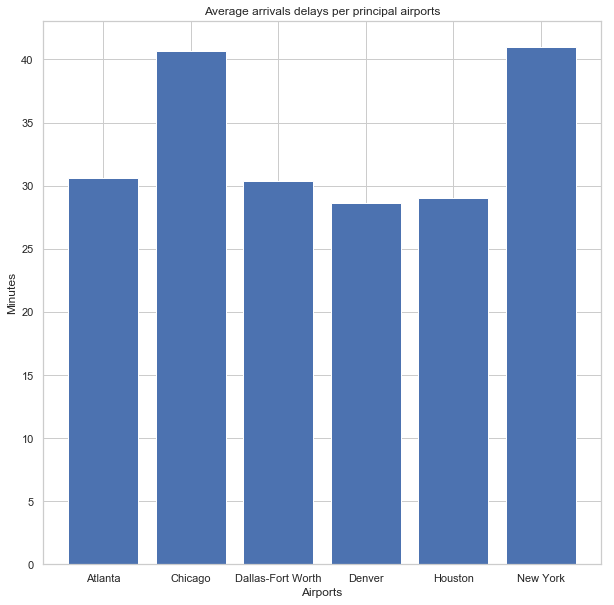

In [187]:
# Average Arrivals delay in the top airports

busy_air_arr_d = df2.query('Origin in @busy_arr.Airport') #filtering for the top arrivals airports
busy_air_arr_d = busy_air_arr_d.groupby(['Origin']).ArrDelay.mean()
busy_air_arr_d = busy_air_arr_d.to_frame().reset_index()

plt.bar(data=busy_air_arr_d, x='Origin', height='ArrDelay')
plt.title('Average arrivals delays per principal airports')
plt.xlabel('Airports')
plt.ylabel('Minutes')
plt.show();

### Carriers with the highest cancellation average

American Airlines and American Eagle are the only two carriers both present in the busiest carrirers and the highest cancellation average rankings. Approximately 3% of the American Arilines flights are cancelled compare to over 3.5% for the American Eagle flights.

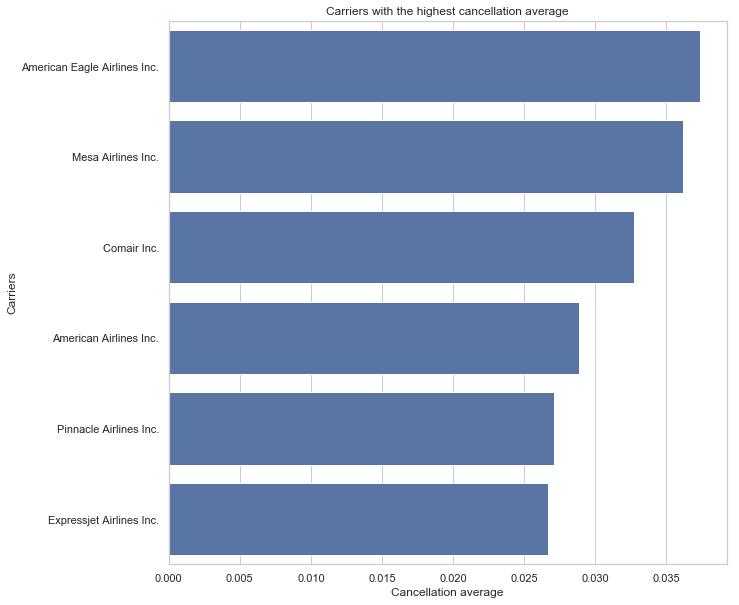

In [188]:
# Plotting Flights cancelled per carrier

df.Cancelled.replace(np.nan, 0, inplace=True)

canc_carr = df.groupby('Carrier').Cancelled.mean()
canc_carr = canc_carr.to_frame().reset_index()
canc_carr = canc_carr.sort_values(by='Cancelled', ascending=False)[:6]
sns.barplot(data=canc_carr, y='Carrier', x='Cancelled', color = base_color)
plt.title('Carriers with the highest cancellation average')
plt.xlabel('Cancellation average')
plt.ylabel('Carriers')

plt.show();

### Cancellation reasons for main carrier for cancellation average

For American Airlines the vast majority of the cancelled flights are due to Carrier issues, whereas for American Eagle the main cancellation factor is the weather.

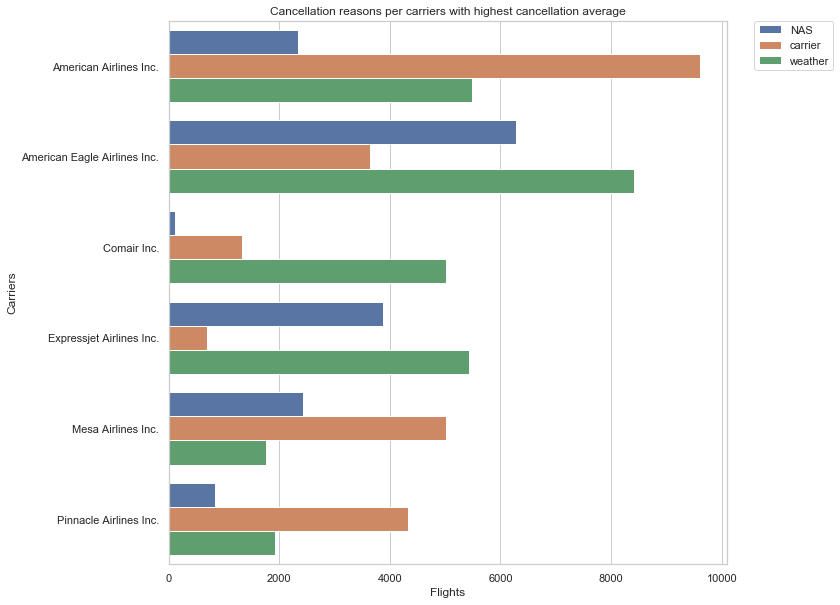

In [189]:
# Plotting Cancellation reasons per top carriers

city_canc_code = df.query('Carrier in @canc_carr.Carrier')
city_canc_code = city_canc_code.groupby(['Carrier', 'CancellationCode']).Year.count() # TO CHECK THE COUNT
city_canc_code = city_canc_code.to_frame().reset_index()
city_canc_code = city_canc_code.rename(columns={'Year': 'Count'})
city_canc_code

sns.barplot(data=city_canc_code, y='Carrier', x='Count', hue='CancellationCode')
plt.title('Cancellation reasons per carriers with highest cancellation average')
plt.xlabel('Flights')
plt.ylabel('Carriers')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### Busiest Carriers departures delay performance in principal airports

In Atlanta, Chicago and Dallas, Continental Airlines is the worst performer, whereas American Airlines and united Airlines have the highest delay average in Denver, New York and Houston.

On the other hand, Delta is constantly in the top two performance acrossa all the 6 airports.

In [190]:
# Creating avg dep delay per top carrier per top dep city dataframe

# Filtering for top departures airports
avg_dep_d_busyair = df1.query('Origin in @busy_dep.Airport')

# Filtering for top departures carriers
dep_busyair_carrier_list = avg_dep_d_busyair.Carrier.value_counts()[:6].index.values

avg_dep_d_busyair = avg_dep_d_busyair.query('Carrier in @dep_busyair_carrier_list')
avg_dep_d_busyair = avg_dep_d_busyair.groupby(['Origin', 'Carrier']).DepDelay.mean()
avg_dep_d_busyair = avg_dep_d_busyair.to_frame().reset_index()
avg_dep_d_busyair.head()

,Origin,Carrier,DepDelay
0,Atlanta,American Airlines Inc.,36.82
1,Atlanta,American Eagle Airlines Inc.,45.96
2,Atlanta,Continental Air Lines Inc.,51.24
3,Atlanta,Delta Air Lines Inc.,26.07
4,Atlanta,United Air Lines Inc.,40.17


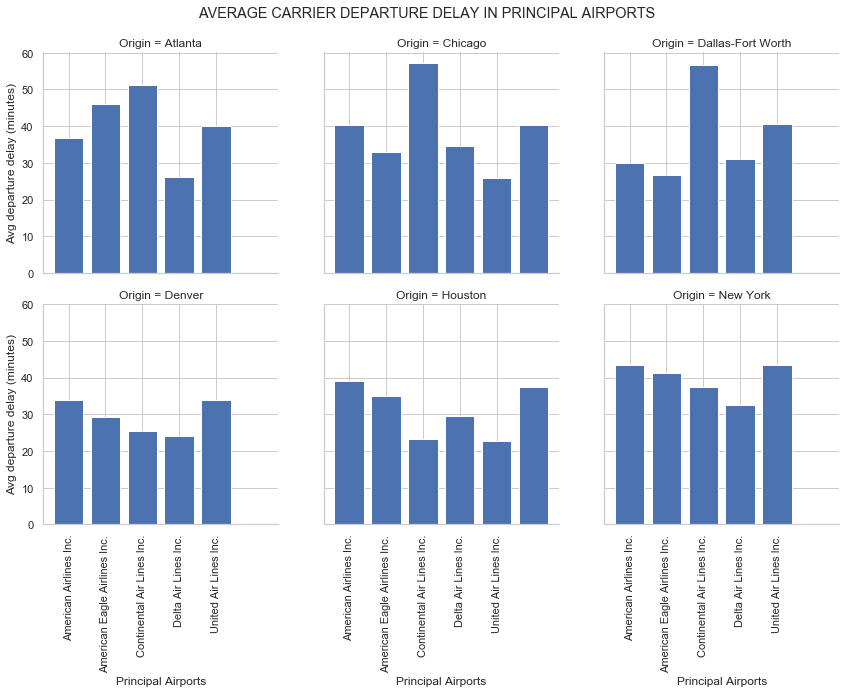

In [191]:
# Plotting avg dep delay per top carrier per top dep city

g_dep = sns.FacetGrid(data=avg_dep_d_busyair, col='Origin',col_wrap=3,  height=4, aspect=1)
g_dep.map(plt.bar, 'Carrier', 'DepDelay')
g_dep.set_axis_labels("Principal Airports", "Avg departure delay (minutes)")
plt.subplots_adjust(top=0.9)
g_dep.fig.suptitle('AVERAGE CARRIER DEPARTURE DELAY IN PRINCIPAL AIRPORTS')
g_dep.set_xticklabels(rotation=90);

In [192]:
# Creating avg dep delay per top carrier for top arrivals airports

# Filtering for top departures airports
avg_arr_d_busyair = df2.query('Dest in @busy_arr.Airport')

# Filtering for top departures carriers
arr_busyair_carrier_list = avg_arr_d_busyair.Carrier.value_counts()[:6].index.values

avg_arr_d_busyair = avg_arr_d_busyair.query('Carrier in @arr_busyair_carrier_list')
avg_arr_d_busyair = avg_arr_d_busyair.groupby(['Dest', 'Carrier']).ArrDelay.mean()
avg_arr_d_busyair = avg_arr_d_busyair.to_frame().reset_index()
avg_arr_d_busyair.head()

,Dest,Carrier,ArrDelay
0,Atlanta,American Airlines Inc.,34.69
1,Atlanta,American Eagle Airlines Inc.,40.56
2,Atlanta,Atlantic Southeast Airlines,37.19
3,Atlanta,Delta Air Lines Inc.,28.85
4,Atlanta,United Air Lines Inc.,41.35


### Busiest Carriers arrivlas delay performance in principal airports

In Atlanta, Chicago, Houston and  Dallas, United Airlines is the worst performer followed closely by American Airlines and American Eagle. New York is no different except for the fact that the worst performer is Atlantic Southeast Airlines.

On the other hand, Denver confirms to be the best airport out of the 6.

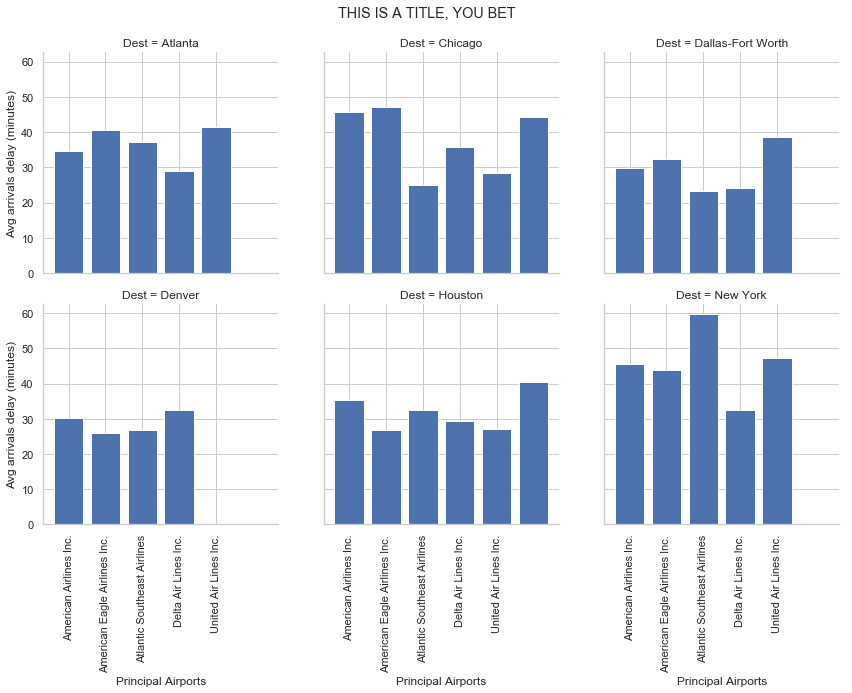

In [193]:
# Plotting avg arr delay per top carrier for top airports

g_arr = sns.FacetGrid(data=avg_arr_d_busyair, col='Dest',col_wrap=3,  height=4, aspect=1)
g_arr.map(plt.bar, 'Carrier', 'ArrDelay')
g_arr.set_axis_labels("Principal Airports", "Avg arrivals delay (minutes)")
plt.subplots_adjust(top=0.9)
g_arr.fig.suptitle('AVERAGE CARRIER ARRIVALS DELAY IN PRINCIPAL AIRPORTS')
g_arr.set_xticklabels(rotation=90);

In [194]:
# Creating avg Dep delay reasons dataframe per carrier for top departures airports

delay_reason_d = df1.iloc[: , 21:]
delay_reason_d = delay_reason_d.drop(['Orig_State', 'Dest', 'Dest_State', 'LateAircraftDelay', 
                                      'SecurityDelay'], axis=1)

delay_reason_d = delay_reason_d.melt(id_vars=['Origin', 'Carrier'], var_name= 'DelayType', value_name='Minutes')
delay_reason_d = delay_reason_d[delay_reason_d.Minutes >0]
delay_reason_d = delay_reason_d.query('Origin in @busy_dep.Airport')
delay_reason_d = delay_reason_d.query('Carrier in @dep_busyair_carrier_list')

delay_reason_d = delay_reason_d.groupby(['Origin', 'Carrier', 'DelayType']).Minutes.mean()
delay_reason_d = delay_reason_d.to_frame().reset_index()
delay_reason_d.head(3)

,Origin,Carrier,DelayType,Minutes
0,Atlanta,American Airlines Inc.,CarrierDelay,39.89
1,Atlanta,American Airlines Inc.,NASDelay,28.88
2,Atlanta,American Airlines Inc.,WeatherDelay,14.37


In [195]:
delay_reason_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
Origin       96 non-null object
Carrier      96 non-null object
DelayType    96 non-null object
Minutes      96 non-null float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


### Busiest Carriers departures delay reasons performance in principal airports

Continental Airlines delays are mostly due to NAS issues in Atlanta, Chicago,  and  Dallas. Here Delta shares the position of worst preformer with Continental, however their delays are entirely due to weather conditions.

In Houston and New York American Airlines and  United Airlines are the worst performers. However, while in those airports United Airlines delays are due only to weather conditions, a consistent portion of the American Airlines delays are also due to carrier issue.

Interestingly, across all 6 airports Delta delays are consistently due soley to weather conditions.

Overall, among the busiest airport and carries, the biggest flight delaying factor is the weather.

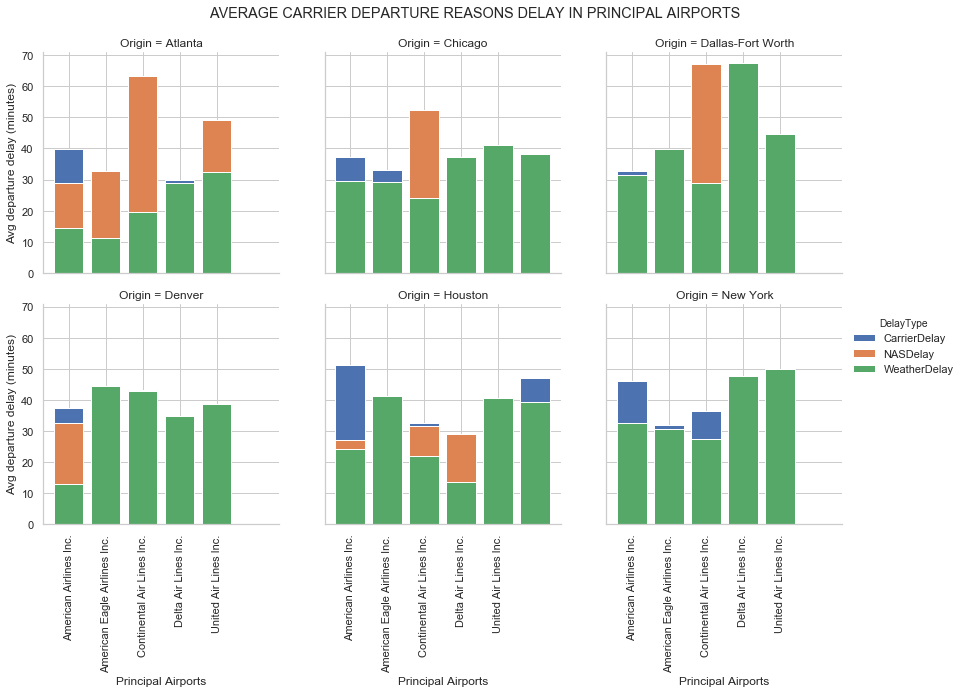

In [196]:
# Plotting avg Dep delay reasons dataframe per carrier for top departures airports

g_reas_d = sns.FacetGrid(data=delay_reason_d, hue='DelayType', col='Origin',col_wrap=3,  height=4, aspect=1)
g_reas_d.map(plt.bar, 'Carrier', 'Minutes')
g_reas_d.set_xticklabels(rotation=90)
g_reas_d.set_axis_labels("Principal Airports", "Avg departure delay (minutes)")
plt.subplots_adjust(top=0.9)
g_reas_d.fig.suptitle('AVERAGE CARRIER DEPARTURE REASONS FOR DELAY IN PRINCIPAL AIRPORTS')
g_reas_d.add_legend();

### Busiest Carriers arrivals delay reasons performance in principal airports

The average weather delay for Atlantic Southest Airlines is constantly the hishest in almost every airport except for Dallas where the delays are entirely due to either carrier or NAS issues. To note that in Chicago Atlantic Southest Airlines average weather delays it is almost double than the other carriers.

Overall, among the busiest airport and carries, the biggest flight delaying factor is confirmed to be the weather.

In [197]:
# Creating avg Dep delay reasons dataframe per carrier for top arrivals airports  

delay_reason_a = df1.iloc[: , 21:]
delay_reason_a = delay_reason_a.drop(['Orig_State', 'Origin', 'Dest_State', 'LateAircraftDelay', 
                                      'SecurityDelay'], axis=1)

delay_reason_a = delay_reason_a.melt(id_vars=['Dest', 'Carrier'], var_name= 'DelayType', value_name='Minutes')
delay_reason_a = delay_reason_a[delay_reason_a.Minutes >0]
delay_reason_a = delay_reason_a.query('Dest in @busy_arr.Airport')
delay_reason_a = delay_reason_a.query('Carrier in @arr_busyair_carrier_list')

delay_reason_a = delay_reason_a.groupby(['Dest', 'Carrier', 'DelayType']).Minutes.mean()
delay_reason_a = delay_reason_a.to_frame().reset_index()
delay_reason_a.head(3)

,Dest,Carrier,DelayType,Minutes
0,Atlanta,American Airlines Inc.,CarrierDelay,32.58
1,Atlanta,American Airlines Inc.,NASDelay,33.65
2,Atlanta,American Airlines Inc.,WeatherDelay,26.08


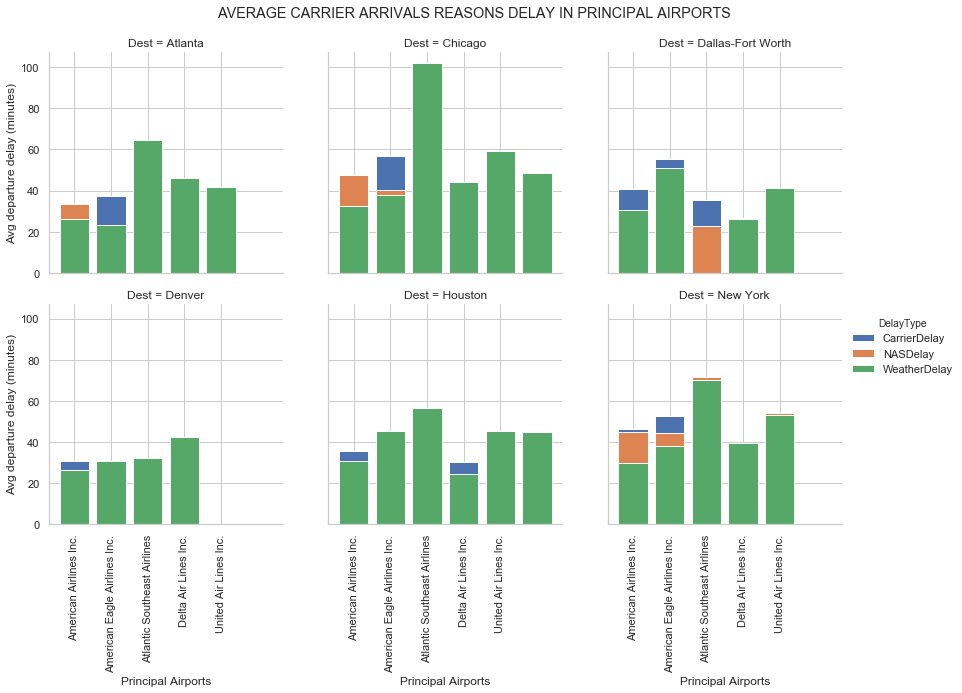

In [198]:
# Plotting avg arr delay reasons dataframe per carrier for top arrivals airports

g_reas_a = sns.FacetGrid(data=delay_reason_a, hue='DelayType', col='Dest',col_wrap=3,  height=4, aspect=1)
g_reas_a.map(plt.bar, 'Carrier', 'Minutes')
g_reas_a.set_xticklabels(rotation=90)
g_reas_a.set_axis_labels("Principal Airports", "Avg departure delay (minutes)")
plt.subplots_adjust(top=0.9)
g_reas_a.fig.suptitle('AVERAGE CARRIER ARRIVALS REASONS DELAY IN PRINCIPAL AIRPORTS')
g_reas_a.add_legend();